#Table of Contents
* [Imports & utility functions](#Imports-&-utility-functions)
* [Get data file names](#Get-data-file-names)
* [First data file](#First-data-file)
	* [Load data](#Load-data)
	* [Plot all of the data](#Plot-all-of-the-data)
	* [Plot first 1.5 ms](#Plot-first-1.5-ms)
	* [First 1 ms (i.e., time before voltage pulse)](#First-1-ms-%28i.e.,-time-before-voltage-pulse%29)
		* [Close-up over 4 us](#Close-up-over-4-us)
	* [Plot data during 100 us pulse](#Plot-data-during-100-us-pulse)
	* [Look at pulse after subtracting mean signal from first ms](#Look-at-pulse-after-subtracting-mean-signal-from-first-ms)
		* [Zoom in - voltage spikes are sparse](#Zoom-in---voltage-spikes-are-sparse)
		* [Zoom in some more and start to use function indexfromtime()](#Zoom-in-some-more-and-start-to-use-function-indexfromtime%28%29)
	* [Count voltage spikes before & during pulse and compare](#Count-voltage-spikes-before-&-during-pulse-and-compare)
	* [Integrate signal](#Integrate-signal)
		* [No adjustment for non-zero average dark signal](#No-adjustment-for-non-zero-average-dark-signal)
		* [Subtract average dark signal](#Subtract-average-dark-signal)


In [48]:
%%javascript
IPython.load_extensions('calico-document-tools');

<IPython.core.display.Javascript object>

# Imports & utility functions

In [54]:
import math
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
import numpy as np
import collections
import os
from __future__ import division
from __future__ import print_function

In [63]:
def indexfromtime(t):
    '''Return data array index that corresponds to time t'''
    delta_t_ms = 0.01e-3  # sampling period is 0.01 us
    start_time_ms = -1.0  # start time for taking data is -1 ms
    return int((t - start_time_ms) / delta_t_ms)

In [74]:
print( indexfromtime(-1), indexfromtime(0), indexfromtime(0.000001), indexfromtime(0.00001), indexfromtime(0.5) )

0 99999 100000 100001 150000


In [75]:
def isbigger(value,threshold):
    if value > threshold:
        return True
    else:
        return False

In [79]:
print( isbigger(0.3, 0.04), isbigger(abs(-0.02), 0.04) )

True False


In [108]:
def countdata(data,i1,i2,threshold):
    numtotal = 0
    numbigger = 0
    for i in range(i1,i2):
        numtotal += 1
        #print(i, data[i],numbigger, numtotal)
        if isbigger(data[i], threshold):
            numbigger += 1
            #print(i, data[i], numbigger, numtotal)
    return numbigger, numtotal

In [109]:
tempdata = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
print(tempdata)
print(countdata(tempdata,0,len(tempdata),0.4))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6]
(2, 7)


In [134]:
def integratediscretedata(data,i1,i2):
    return np.sum(data[i1:i2])

In [137]:
print( integratediscretedata(tempdata,0,3), integratediscretedata(tempdata,2,3))

0.3 0.2


# Get data file names 

In [8]:
datadirectory = "20150316_data"
list1 = []
list2 = []
for file in os.listdir(datadirectory):
    if file.endswith(".csv"):
        if float(file[8:12]) < 1000:
            list1.append(file)
        else:
            list2.append(file)
list1.sort()
list2.sort()
datafilenames = list1 + list2
datafilenames

['sample1_100.0us.csv',
 'sample1_200.0us.csv',
 'sample1_300.0us.csv',
 'sample1_400.0us.csv',
 'sample1_500.0us.csv',
 'sample1_600.0us.csv',
 'sample1_700.0us.csv',
 'sample1_800.0us.csv',
 'sample1_900.0us.csv',
 'sample1_1000.0us.csv',
 'sample1_1500.0us.csv',
 'sample1_2000.0us.csv',
 'sample1_2500.0us.csv',
 'sample1_3000.0us.csv',
 'sample1_4000.0us.csv',
 'sample1_5000.0us.csv',
 'sample1_8000.0us.csv',
 'sample1_9000.0us.csv']

In [6]:
len(datafilenames)

18

#First data file

## Load data 

In [9]:
data = np.loadtxt(datadirectory + '/' + datafilenames[0], delimiter=',')

In [23]:
time_ms = data[:,0]*1000.
np.shape(data)

(999999, 3)

## Plot all of the data

(-1.01, 9.01)

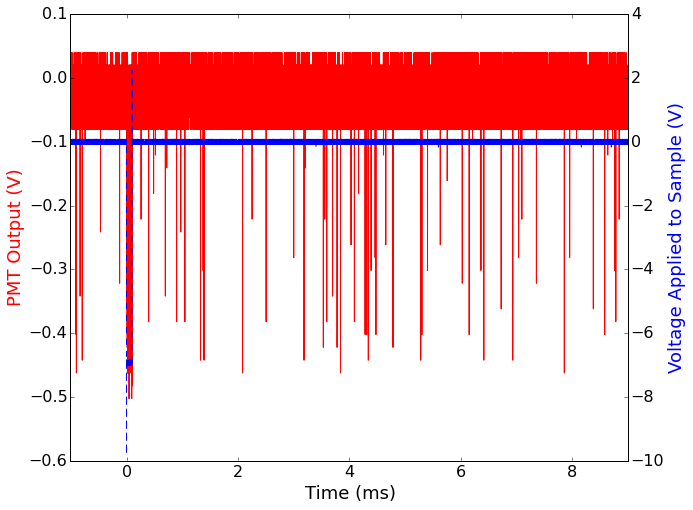

In [26]:
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2], 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(-1.01,9.01)


## Plot first 1.5 ms

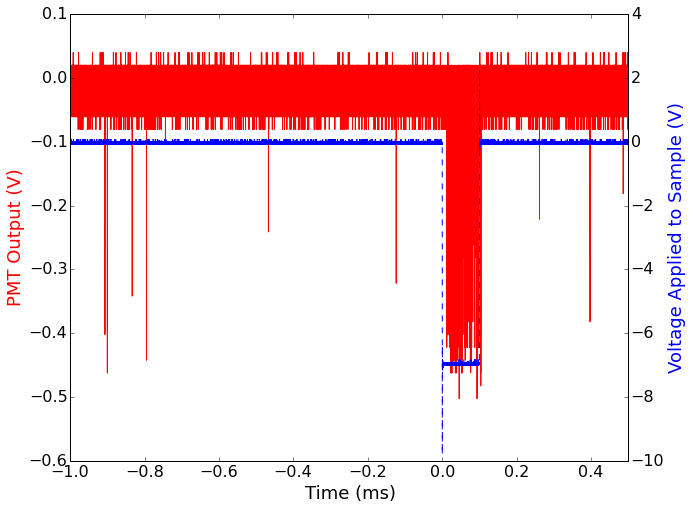

In [32]:
xmin = -1.0
xmax = 0.5
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2], 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(xmin,xmax);

## First 1 ms (i.e., time before voltage pulse)

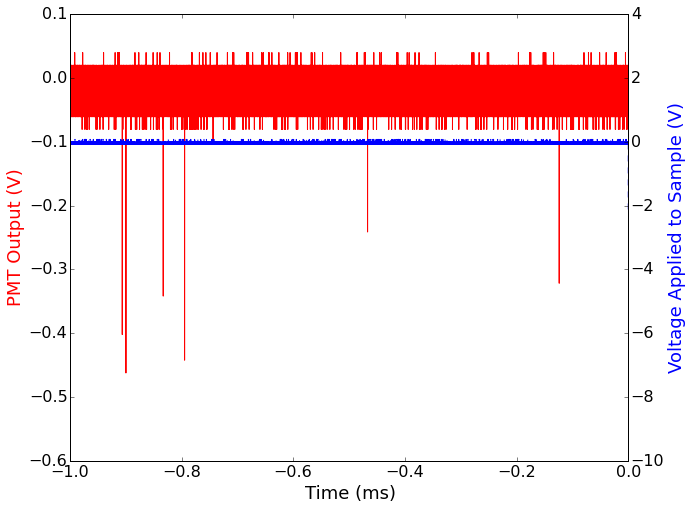

In [33]:
xmin = -1.0
xmax = 0.0
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2], 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(xmin,xmax);

In [44]:
np.shape(data[0:100000,2])

(100000,)

### Close-up over 4 us

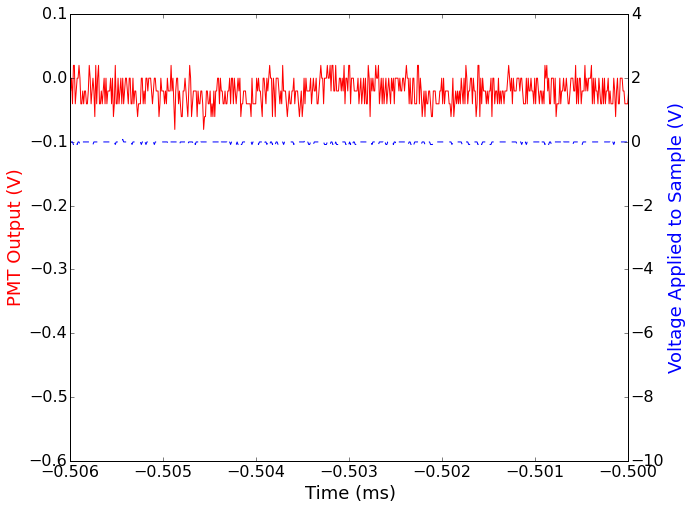

In [37]:
xmin = -0.506
xmax = -0.5
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2], 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(xmin,xmax);

Observations:
- 6 ADC levels in PMT channel noise 

## Plot data during 100 us pulse

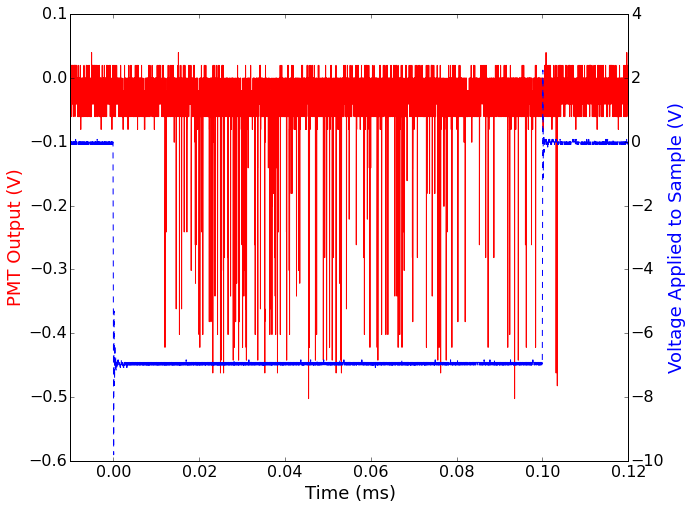

In [30]:
xmin = -0.01
xmax = 0.12
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2], 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(xmin,xmax);

## Look at pulse after subtracting mean signal from first ms

In [131]:
mean_alldata = np.mean(data[:,2])
mean_firstms = np.mean(data[0:100000,2])
std_alldata = np.std(data[:,2])
std_firstms = np.std(data[0:100000,2])
print('averages:', mean_alldata, mean_firstms)
print('std devs: ', std_alldata, std_firstms)

averages: -0.0213481284751 -0.02169504448
std devs:  0.0219087365852 0.0211752795094


In [129]:
print(np.mean(data[:,2]) - mean_firstms)

0.000346916004872


In [128]:
print(np.mean( (data[:,2] - mean_firstms) ) )
print(np.std( (data[:,2] - mean_firstms) ) )

0.000346916004872
0.0219087365852


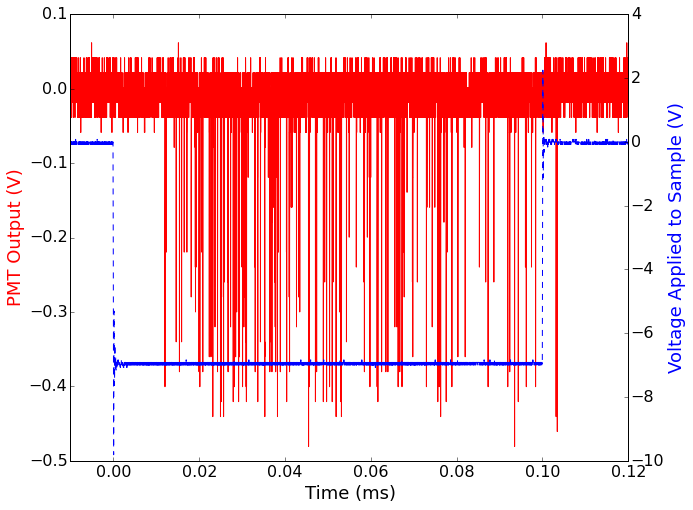

In [50]:
xmin = -0.01
xmax = 0.12
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2] - mean_firstms, 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(xmin,xmax);

### Zoom in - voltage spikes are sparse

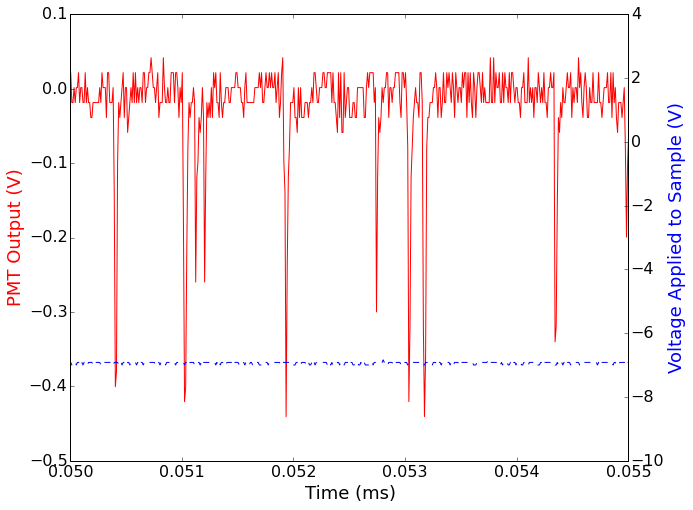

In [51]:
xmin = 0.05
xmax = 0.055
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms, data[:,2] - mean_firstms, 'r')
ax1.plot(time_ms, data[:,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
ax0.set_xlim(xmin,xmax);

### Zoom in some more and start to use function indexfromtime()

-1.000066 -0.9999661
105000 0.0499339 105049 0.0504239


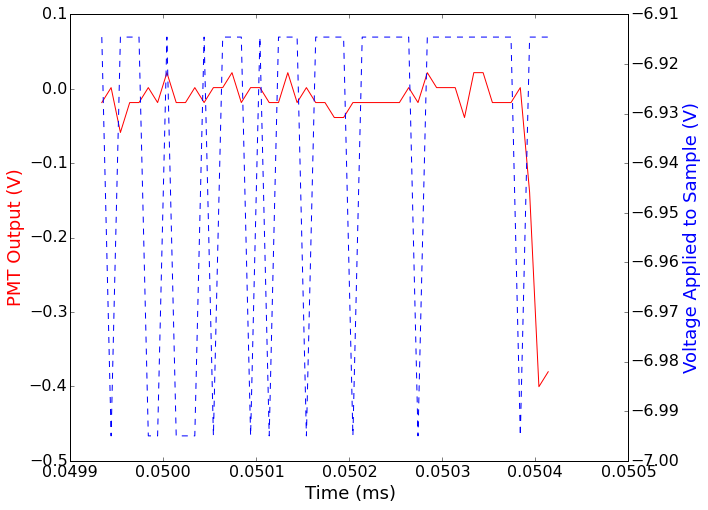

In [86]:
xmin = 0.05
xmax = 0.051
imin = indexfromtime(0.050)
imax = indexfromtime(0.0505)
print(time_ms[0],time_ms[10])
print(imin,time_ms[imin],imax,time_ms[imax])
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms[imin:imax], data[imin:imax,2] - mean_firstms, 'r')
ax1.plot(time_ms[imin:imax], data[imin:imax,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
#ax0.set_xlim(xmin,xmax);

-1.000066 -0.9999661
99950 -0.0005661 100099 0.0009239


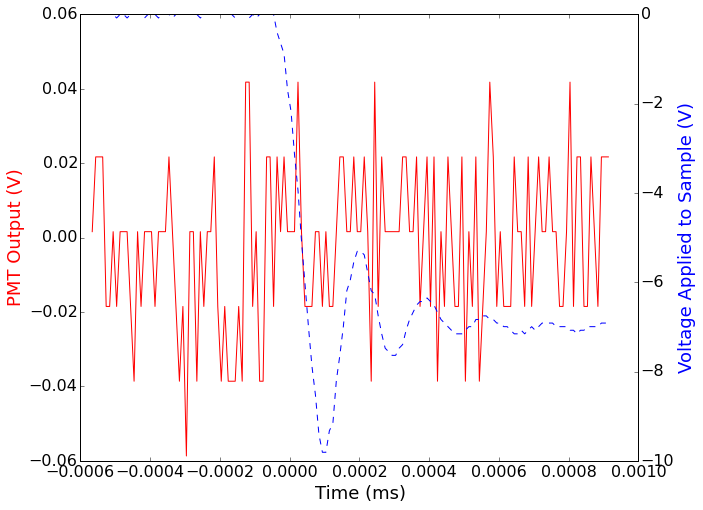

In [89]:
tmin = -0.0005
tmax = 0.001
imin = indexfromtime(tmin)
imax = indexfromtime(tmax)
print(time_ms[0],time_ms[10])
print(imin,time_ms[imin],imax,time_ms[imax])
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms[imin:imax], data[imin:imax,2] - mean_firstms, 'r')
ax1.plot(time_ms[imin:imax], data[imin:imax,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
#ax0.set_xlim(tmin,tmax);

-1.000066 -0.9999661
98999 -0.0100761 111000 0.1099339


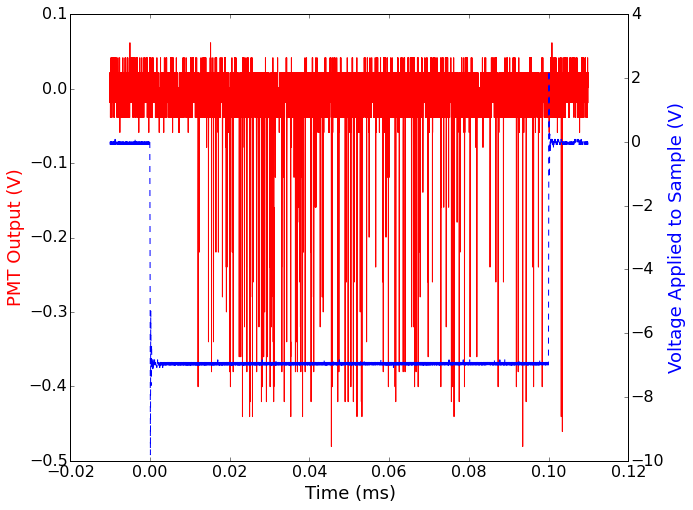

In [92]:
tmin = -0.01
tmax = 0.11
imin = indexfromtime(tmin)
imax = indexfromtime(tmax)
print(time_ms[0],time_ms[10])
print(imin,time_ms[imin],imax,time_ms[imax])
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(time_ms[imin:imax], data[imin:imax,2] - mean_firstms, 'r')
ax1.plot(time_ms[imin:imax], data[imin:imax,1], 'b--')
ax0.set_xlabel('Time (ms)', fontsize=18)
ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
ax0.tick_params(axis='x', labelsize=16)
ax0.tick_params(axis='y', labelsize=16)
ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
ax1.tick_params(axis='y', labelsize=16)
#ax0.set_xlim(tmin,tmax);

## Count voltage spikes before & during pulse and compare

In [116]:
tmin = -1.0
tmax = 0.0
imin = indexfromtime(tmin)
imax = indexfromtime(tmax)
pre_counts = countdata(abs(data[:,2]), imin, imax, 0.1)
tmin = 0.0
tmax = 0.1
imin = indexfromtime(tmin)
imax = indexfromtime(tmax)
pulse_counts = countdata(abs(data[:,2]), imin, imax, 0.1)
print(' counts before pulse:', pre_counts, pre_counts[0]/pre_counts[1])
print(' counts during pulse:', pulse_counts, pulse_counts[0]/pulse_counts[1])

 counts before pulse: (20, 99999) 0.00020000200002
 counts during pulse: (475, 10001) 0.047495250475


In [124]:
print('             number of counts per ms prior to voltage pulse:', pre_counts[0])
print('               number of counts per ms during voltage pulse:', pulse_counts[0]/0.1)
print('adjusted ratio ')
print('(pulse_counts_per_ms - pre_counts_per_ms)/pre_counts_per_ms:', 
      ((pulse_counts[0]/0.1) - pre_counts[0])/pre_counts[0])

             number of counts per ms prior to voltage pulse: 20
               number of counts per ms during voltage pulse: 4750.0
adjusted ratio 
(pulse_counts_per_ms - pre_counts_per_ms)/pre_counts_per_ms: 236.5


## Integrate signal

### No adjustment for non-zero average dark signal

In [142]:
tmin, tmax = -1.0, 0.0
tintervalbeforepulse = tmax - tmin
totsignalbeforepulse = integratediscretedata(data[:,2], indexfromtime(tmin), indexfromtime(tmax))
tmin, tmax = 0.0, 0.1
tpulse = tmax - tmin
totsignalinpulse = integratediscretedata(data[:,2], indexfromtime(tmin), indexfromtime(tmax))
print( 'total signals before and during pulse:', totsignalbeforepulse, totsignalinpulse )
print( '                 total signals per ms:', totsignalbeforepulse / tintervalbeforepulse, totsignalinpulse / tpulse )

total signals before and during pulse: -2169.444146 -384.544695
                 total signals per ms: -2169.444146 -3845.44695


### Subtract average dark signal

In [133]:
pmtdata_adjusted = data[:,2] - mean_firstms

In [141]:
tmin, tmax = -1.0, 0.0
tintervalbeforepulse = tmax - tmin
totsignalbeforepulse = integratediscretedata(pmtdata_adjusted, indexfromtime(tmin), indexfromtime(tmax))
tmin, tmax = 0.0, 0.1
tpulse = tmax - tmin
totsignalinpulse = integratediscretedata(pmtdata_adjusted, indexfromtime(tmin), indexfromtime(tmax))
print( 'total signals before and during pulse:', totsignalbeforepulse, totsignalinpulse )
print( '                 total signals per ms:', totsignalbeforepulse / tintervalbeforepulse, totsignalinpulse / tpulse )

total signals before and during pulse: 0.0386069555198 -167.572555156
                 total signals per ms: 0.0386069555198 -1675.72555156


# Analyze all data files (integrate signals)

In [144]:
pulseLength_ms = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,\
                           1.5, 2, 2.5, 3, 4, 5, 8, 9])
print(len(pulseLength_ms), len(datafilenames))

18 18


In [145]:
lightduringpulse = np.zeros(len(datafilenames))
lightbeforepulse = np.zeros(len(datafilenames))
meanbeforpulse = np.zeros(len(datafilenames))
stdbeforpulse = np.zeros(len(datafilenames))
tmin, tmax = -1.0, 0.0
tintervalbeforepulse = tmax - tmin

for i,filename in enumerate(datafilenames):
    
    data = np.loadtxt(datadirectory + '/' + filename, delimiter=',')
    
    meanbeforpulse[i] = np.mean(data[indexfromtime(tmin):indexfromtime(tmax),2])
    stdbeforpulse[i] = np.std(data[indexfromtime(tmin):indexfromtime(tmax),2])
    
    pmtdata_adjusted = data[:,2] - meanbeforpulse[i]
    
    lightbeforepulse[i] = integratediscretedata(pmtdata_adjusted, indexfromtime(tmin), indexfromtime(tmax))
    
    tpulsemin, tpulsemax = 0.0, pulseLength_ms[i]
    tpulse = tpulsemax - tpulsemin
    lightduringpulse[i] = integratediscretedata(pmtdata_adjusted, indexfromtime(tpulsemin), indexfromtime(tpulsemax))
    
    print(i, filename, meanbeforpulse[i], stdbeforpulse[i], lightbeforepulse[i], lightduringpulse[i])


0 sample1_100.0us.csv -0.0216946584066 0.0211750334357 -2.43360886998e-13 -167.576416276
1 sample1_200.0us.csv -0.0211907257773 0.0216831502007 -7.1054273576e-14 -235.626470455
2 sample1_300.0us.csv -0.0211656060761 0.0207978994702 -2.44693154627e-13 -306.061679112
3 sample1_400.0us.csv -0.0216960714407 0.0205262498746 2.96429547575e-13 -380.084946371
4 sample1_500.0us.csv -0.0215475256653 0.0204971800857 4.04121180964e-13 -383.677193212
5 sample1_600.0us.csv -0.0221738683387 0.0206067119886 -4.66959804157e-13 -421.779009811
6 sample1_700.0us.csv -0.0218508475885 0.020541183 -3.43336470365e-13 -395.338805807
7 sample1_800.0us.csv -0.0234838496285 0.0194549252421 -5.45785638906e-13 -421.848276871
8 sample1_900.0us.csv -0.0229789188392 0.0193781946602 -2.30482299912e-13 -501.906583473
9 sample1_1000.0us.csv -0.0243228627086 0.0190899934379 -5.49338352585e-13 -485.022049137
10 sample1_1500.0us.csv -0.0225129815098 0.0193161827587 -4.70734562441e-13 -579.063760528
11 sample1_2000.0us.csv -

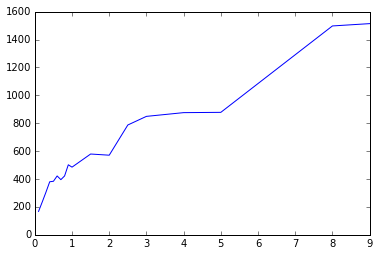

In [148]:
fig, ax = plt.subplots()
ax.plot(pulseLength_ms, abs(lightduringpulse))